# Dependencies

In [2]:
# setup gui for matplotlib interactive plots - move to bookeh lateron
%matplotlib notebook 
%run acquisition_dependencies.py

warnings.filterwarnings("ignore")

ImportError: cannot import name 'GPIO'

*Test LED switching before anything else*

# Settings # 
*Spectrometer*

In [14]:
%run modules/MyOpticsLab.py


 Hello pi! Welcome to LabOptica :)

 The following Ocean Optics devices have been recognized:
[<SeaBreezeDevice USB2000PLUS:USB2+H02391>]

 Connected to USB2000plusXR


interactive(children=(RadioButtons(description='devices', options=('USB2000plusXR',), value='USB2000plusXR'), Checkbox(value=False, description='light'), Output()), _dom_classes=('widget-interact',))

In [15]:
detector = OO['USB2000plusXR']

*LEDs*

In [31]:
sensors = {'left':
               {'GPIO-pin':23, 'IT':3000}, 
           
           'right':
               {'GPIO-pin':24, 'IT':3000}
          }

*Summarize settings to pass to Measurement instance*

In [48]:
settings = {'experiment': 'TwinChips_X2_Calibrationgreen',
          'detector':detector.name,
          'sensors':sensors,
          'dir': os.getcwd()+'/' + 'TwinChips' +'/'}

# Initiate Calibration

*Create Instance of Measurement*

In [49]:
Calibration = Measurement(OO, **settings)

*Test LED intensities*

<IPython.core.display.Javascript object>


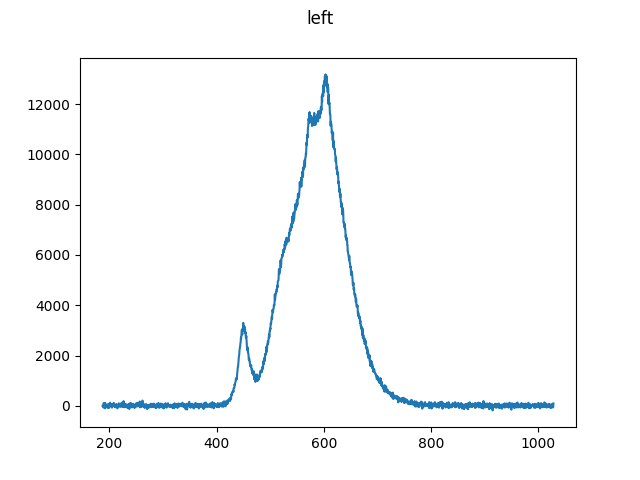

<IPython.core.display.Javascript object>


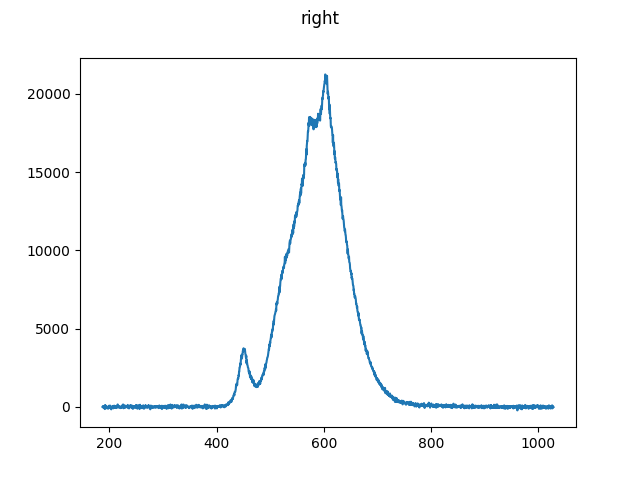

In [39]:
Calibration.test_intensities(1)

In [37]:
help(Calibration.save_intensities)

Help on method save_intensities in module modules.MyMeasurement:

save_intensities(label, N, as_txt=False, confirm=False) method of modules.MyMeasurement.Measurement instance



*Define concentrations*

### Pelikan Green

In [1]:
v_diG = np.array([0.15, 
                  0.075, 
                  0.0375, 
                  0.025, 
                  0.01875, 
                  0.015, 
                  0.01, 
                  0.])

c_d1G = 5
v_tot = 1.5
c_diG = v_diG*c_d1G/v_tot
print('Volums of Dilution 1:', v_diG, 'mL')
print('Volumns of H2O to add:', v_tot-v_diG, 'mL')

NameError: name 'np' is not defined

### Pelikan Red

In [ ]:
v_diR = 2*np.array([0.15, 
                  0.075, 
                  0.0375, 
                  0.025, 
                  0.01875, 
                  0.015, 
                  0.01, 
                  0.])
c_d1R = 10
v_tot = 1.5
c_diR = v_d1R*c_d1R/v_tot
print('Volums of Dilution 1:', v_diR, 'mL')
print('Volumns of H2O to add:', v_tot-v_diR, 'mL')

*Start Calibration*

confirm to measure 0.0 v/v %


<IPython.core.display.Javascript object>


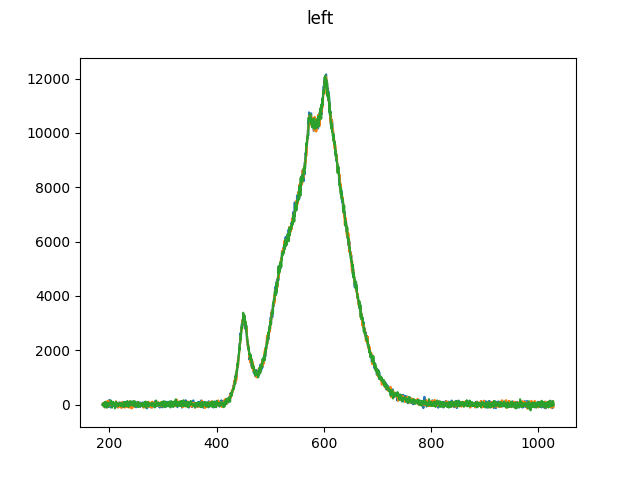

<IPython.core.display.Javascript object>


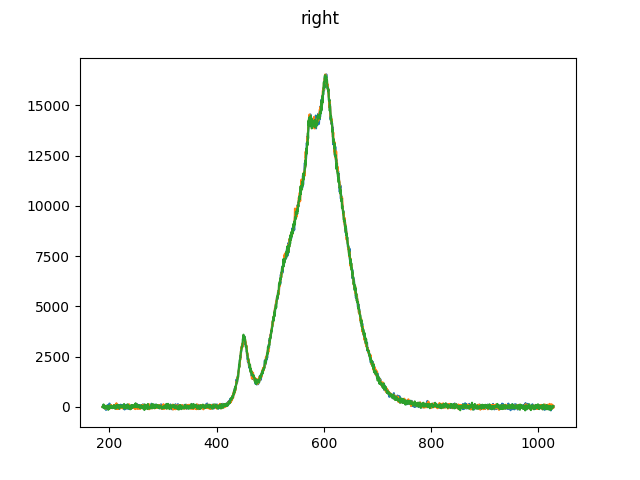

confirm to measure 0.671 v/v %


<IPython.core.display.Javascript object>


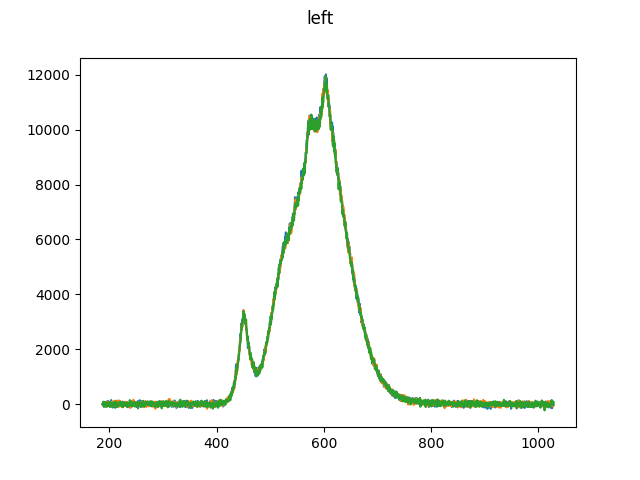

<IPython.core.display.Javascript object>


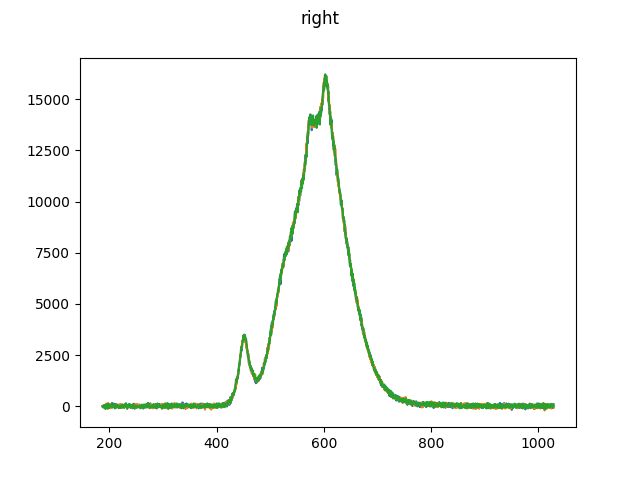

confirm to measure 1.01 v/v %


<IPython.core.display.Javascript object>


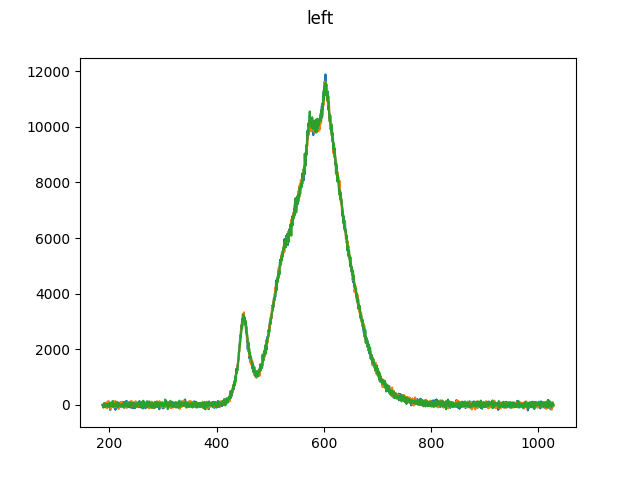

<IPython.core.display.Javascript object>


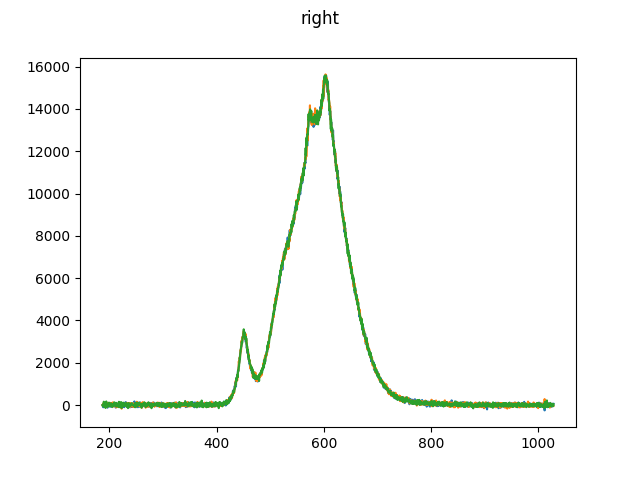

confirm to measure 1.266 v/v %


<IPython.core.display.Javascript object>


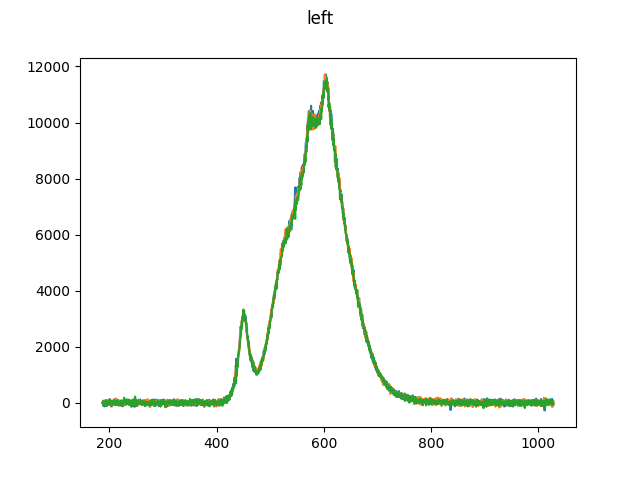

<IPython.core.display.Javascript object>


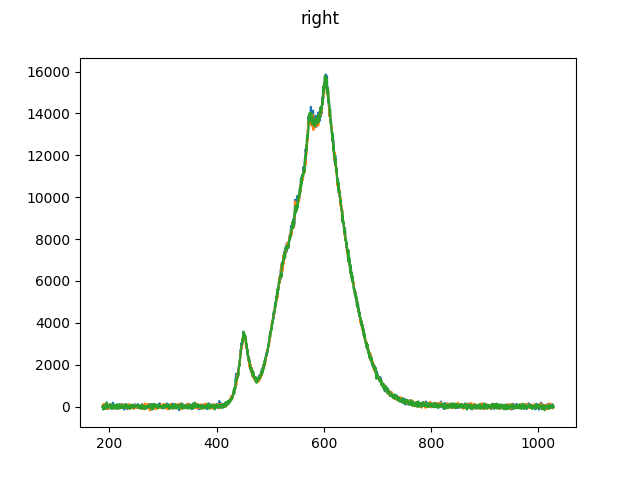

confirm to measure 1.695 v/v %


<IPython.core.display.Javascript object>


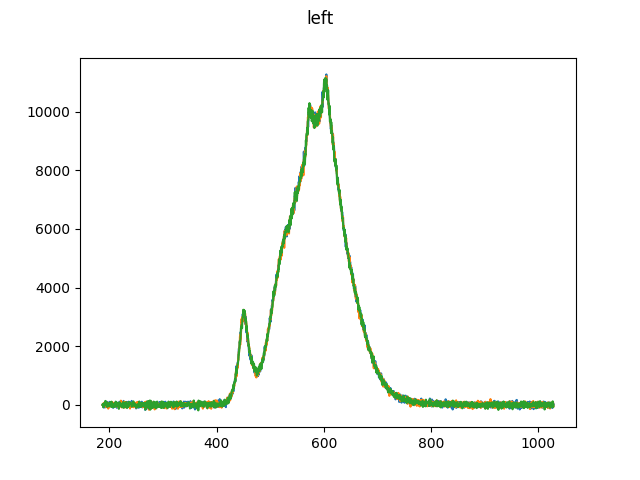

<IPython.core.display.Javascript object>


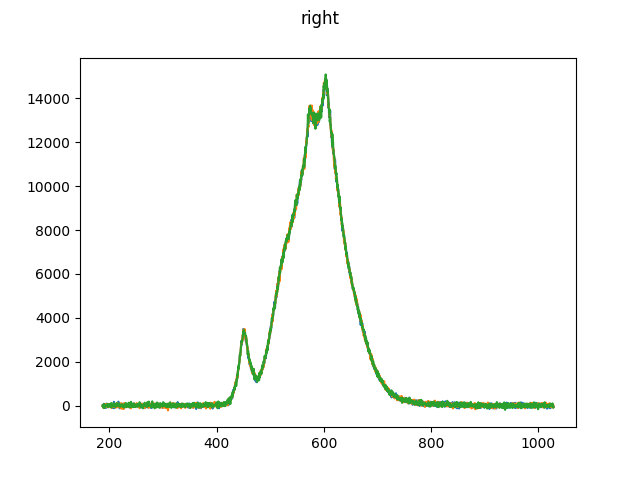

confirm to measure 2.564 v/v %


<IPython.core.display.Javascript object>


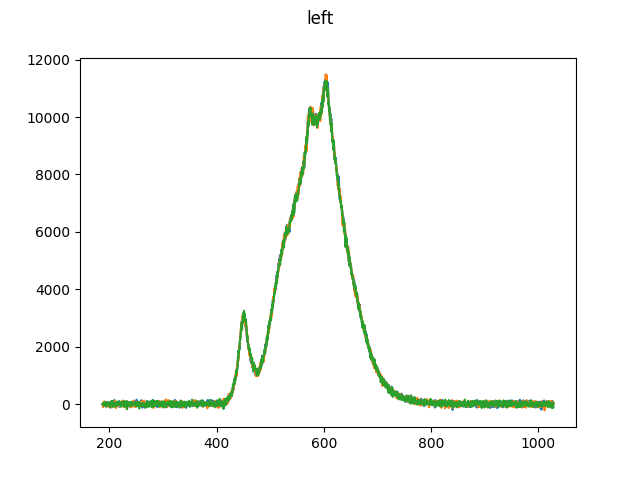

<IPython.core.display.Javascript object>


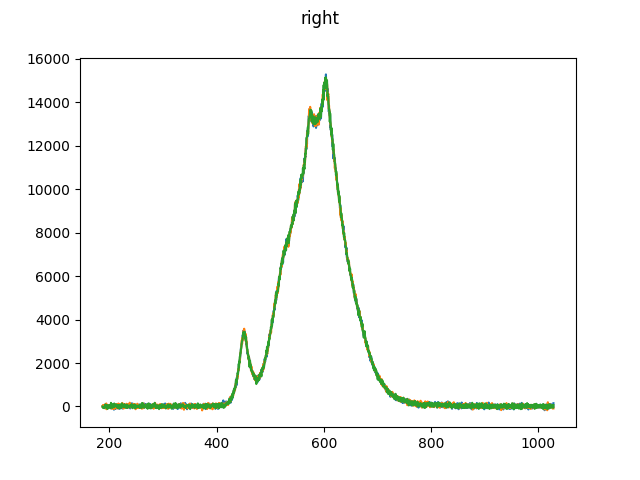

confirm to measure 5.263 v/v %


<IPython.core.display.Javascript object>


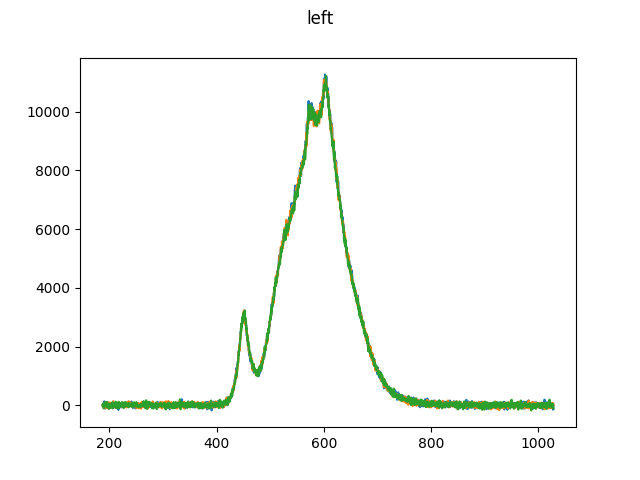

<IPython.core.display.Javascript object>


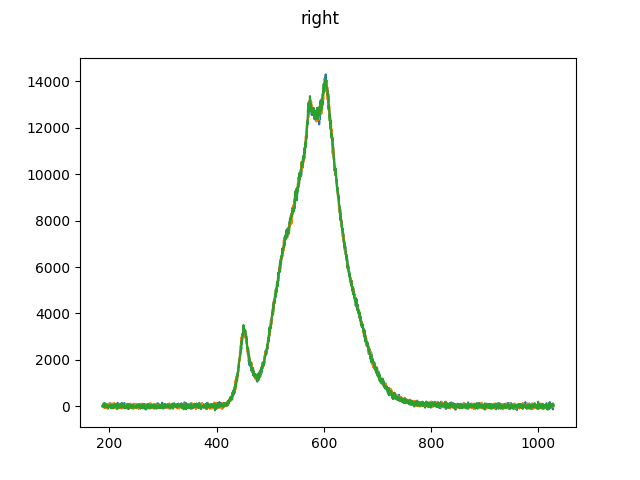

confirm to measure 11.111 v/v %


<IPython.core.display.Javascript object>


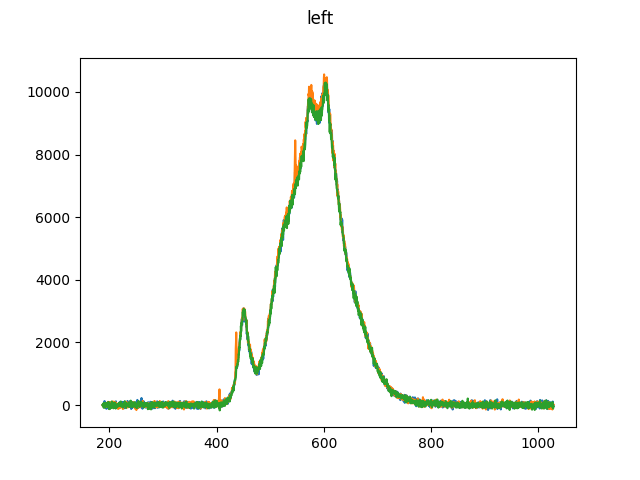

<IPython.core.display.Javascript object>


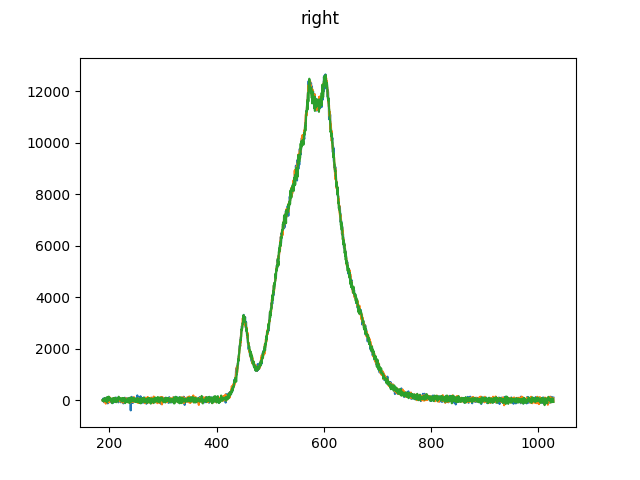

In [50]:
for concentration in c_diG :
    #convert number (float) to 'string'
    c_str = str(round(concentration*100, 3))
    # wait for user confirmation to proceed
    input('confirm to measure ' + c_str + ' U/mL %')
    # Execute data acquisition
    Calibration.save_intensities(concentration, 3)

**For later use:** *set parameters for periodic data acquisition and back them up*

*start automatic data acquisition*